In [1]:
!pip install seaborn pandas scipy scikit-learn dask[complete]
!python3 -m pip install --upgrade pip

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import pandas as pd
import seaborn as sns
from keras.optimizers import Adam

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

2024-02-23 10:08:26.341867: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 10:08:26.341901: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 10:08:26.342925: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-23 10:08:26.349048: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
data_dir = pathlib.Path('data').with_suffix('')

In [4]:
data = 'data'

paths = [path.parts[-2:] for path in
         pathlib.Path(data).rglob('*.*')]                             #writing purpose ('*.*') so that all image formats can be retrieved
df = pd.DataFrame(data=paths, columns=['Class','Images'])     #create column names for dataframe
df = df.sort_values('Class',ascending=True)                   #sort class name
df.reset_index(drop=True, inplace=True)                       #sort index of each row
df                                                            #display dataframe

,Class,Images
0,architecture,13889459351_6c8f23a919_m.jpg
1,architecture,3931866179_8b0bcb4710.jpg
2,architecture,4774625473_ffbd471dea_n.jpg
3,architecture,8710030155_4d8d981b48_m.jpg
4,architecture,120px-Obernai_StPierre-Paul_16.jpg
...,...,...
35088,travel_and_adventure,Places365_val_00006594.jpg
35089,travel_and_adventure,Places365_val_00008551.jpg
35090,travel_and_adventure,Places365_val_00010270.jpg
35091,travel_and_adventure,Places365_val_00011342.jpg


In [5]:
print('Count the number of image datasets')
print("Image Count : {}".format(len(df.Images)))
print("Class Count : {} \n".format(len(df['Class'].value_counts())))
print('Count the number of images in each class')
print(df['Class'].value_counts())

Count the number of image datasets
Image Count : 35093
Class Count : 4 

Count the number of images in each class
Class
travel_and_adventure    8800
food_and_drinks         8780
architecture            8763
art_and_culture         8750
Name: count, dtype: int64


Text(0, 0.5, 'Count Image')

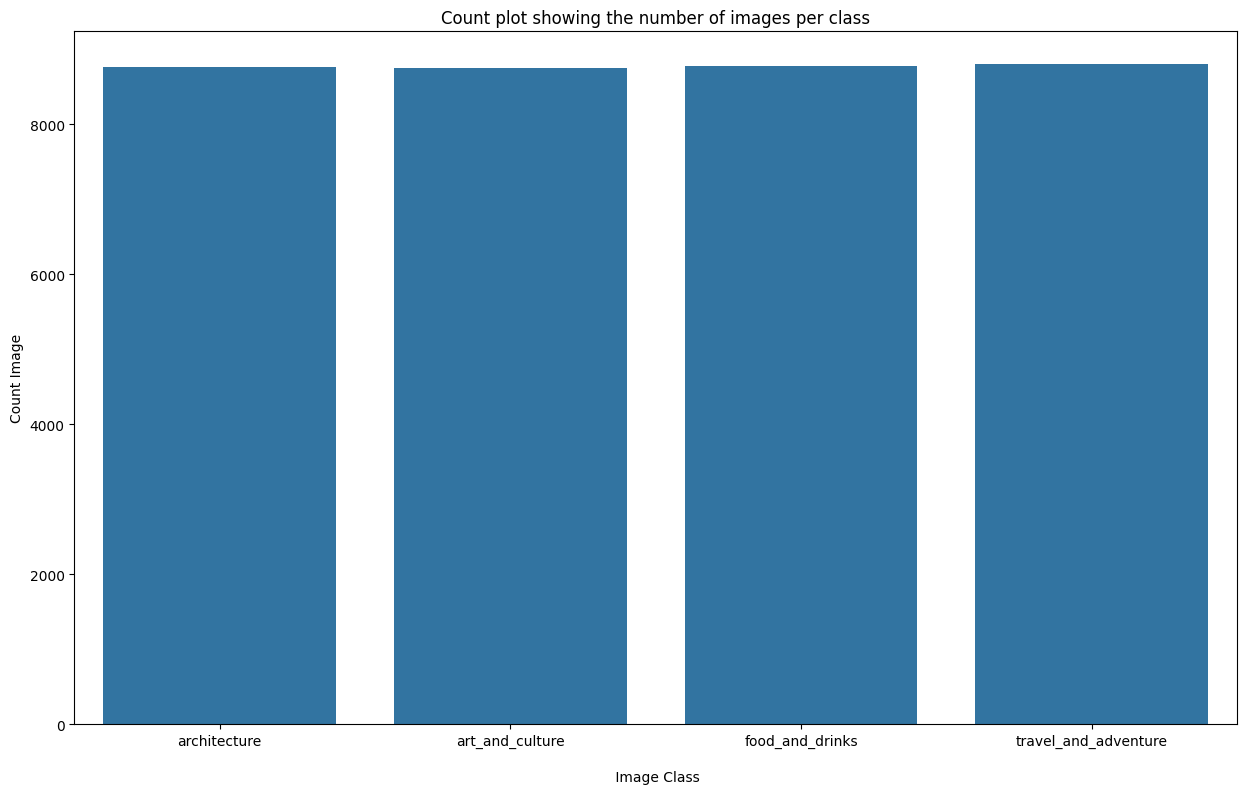

In [6]:
fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(data=df, x='Class')
plt.title('Count plot showing the number of images per class')
plt.xlabel('\n Image Class')
plt.ylabel('Count Image')

We have a good distribution of images, no over- or underepresentation of any of the classes.

In [7]:
image_count = len(list(data_dir.glob('*/*.jpeg')))+len(list(data_dir.glob('*/*.jpg')))+len(list(data_dir.glob('*/*.png'))) 
print(image_count)

34984


In [8]:
directories = {'architecture': 'data/architecture/',
               'art_and_culture': 'data/art_and_culture/',
               'food_and_drinks': 'data/food_and_drinks/',
               'travel_and_adventure': 'data/travel_and_adventure/'
               
              }

def get_dims(file):
  im = Image.open(file)
  
  arr = np.array(im)
  h,w,d = arr.shape
  return h,w

def get_rgb(file):
    im = Image.open(file)
    arr = np.array(im)
    r_mean = np.mean(arr[:,:,0])
    g_mean = np.mean(arr[:,:,1])
    b_mean = np.mean(arr[:,:,2])
    bright_mean = np.mean([r_mean, g_mean, b_mean])
    return r_mean, g_mean, b_mean, bright_mean

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:868: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


[########################################] | 100% Completed | 1.87 ss
[########################################] | 100% Completed | 1.96 ss
[########################################] | 100% Completed | 2.18 ss
[########################################] | 100% Completed | 1.87 ss


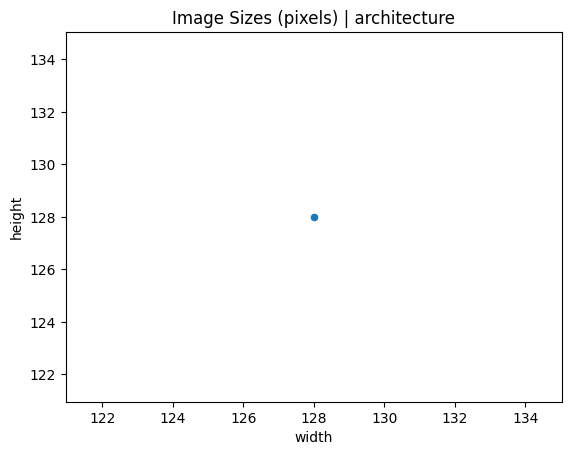

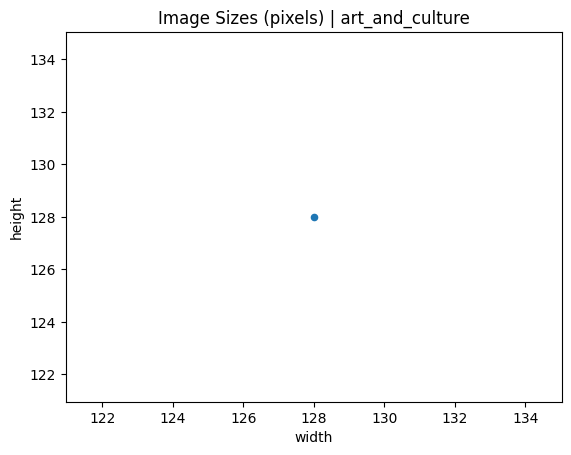

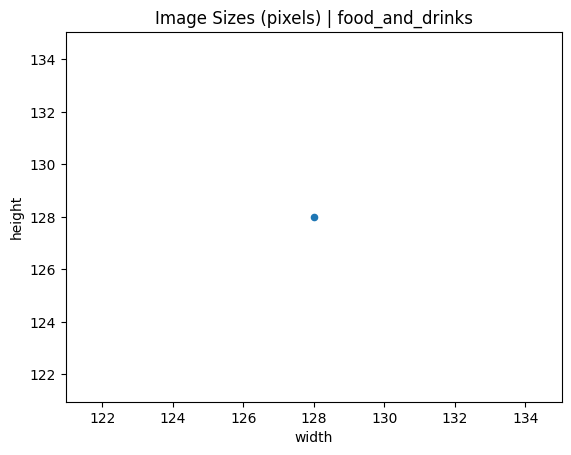

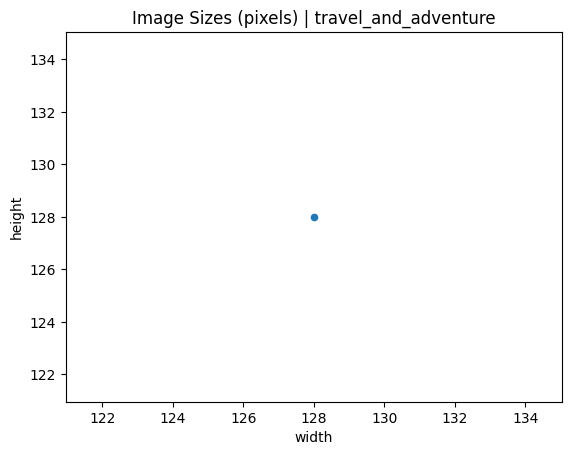

In [9]:
import os
import dask.bag as db
import dask.array as da
from dask.diagnostics import ProgressBar
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#We have to resize the images, not all of them are at 128 x 128 - rerun this file afterwards
i = 0
for n,d in directories.items():
  filepath = d
  filelist = [filepath + f for f in os.listdir(filepath)]
  for file in filelist:
      if file.endswith('.jpg'):
          new_name = "Image_{}.jpg".format(i)
          i = i+1
          new_full_name = filepath + new_name
          os.rename(file, new_full_name)
          file = new_full_name
          im = Image.open(file)
          im = im.resize((128,128))
          im = im.convert('RGB')
          im.save(file)
      elif file.endswith('.jpeg'):
          new_name = "Image_{}.jpeg".format(i)
          i = i+1
          new_full_name = filepath + new_name
          os.rename(file, new_full_name)
          file = new_full_name
          im = Image.open(file)
          im = im.resize((128,128))
          im = im.convert('RGB')
          im.save(file)
      elif file.endswith('.png'):
          new_name = "Image_{}.jpeg".format(i)
          i = i+1
          new_full_name = filepath + new_name
          os.rename(file, new_full_name)
          file = new_full_name
          im = Image.open(file)
          im = im.resize((128,128))
          im = im.convert('RGB')
          im.save(file)
      else:
          os.remove(file)

for n,d in directories.items():
  filepath = d
  filelist = [filepath + f for f in os.listdir(filepath)]
  dims = db.from_sequence(filelist).map(get_dims)
    
  with ProgressBar():
    dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
    plt.title('Image Sizes (pixels) | {}'.format(n))

<Axes: xlabel='Brightness', ylabel='Count'>

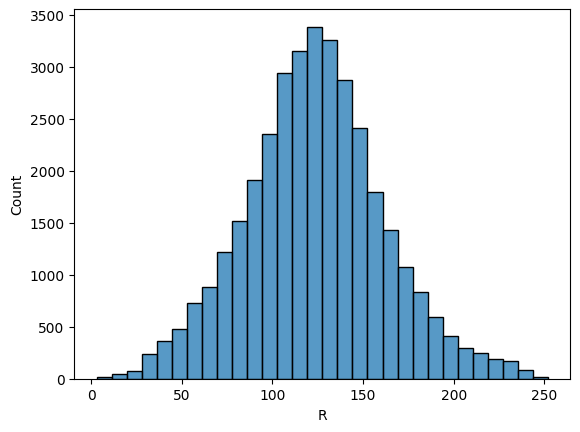

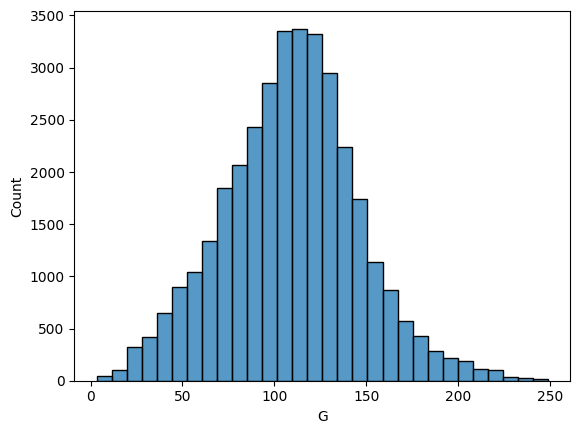

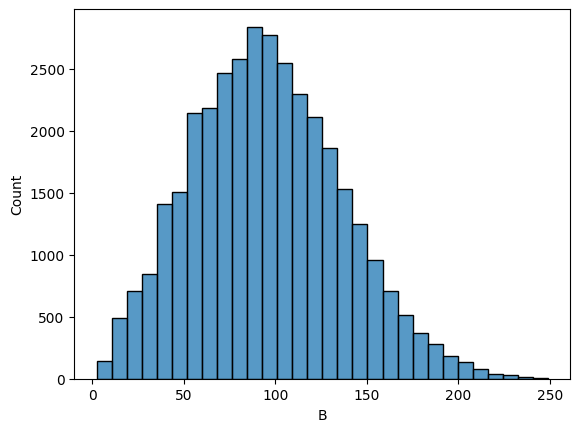

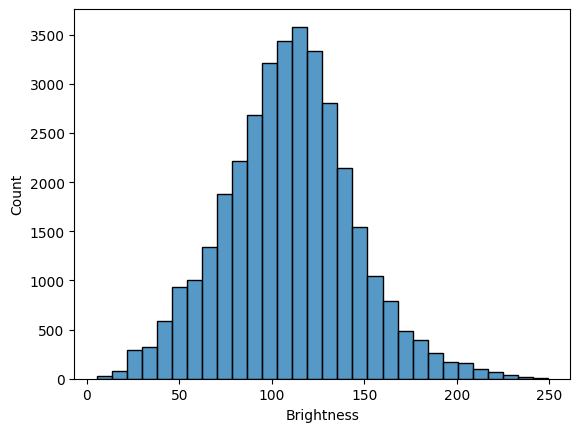

In [10]:
filelist=[]
for n,d in directories.items():
  filepath = d
  filelist+=[filepath + f for f in os.listdir(filepath)]

r_array=[]
g_array=[]
b_array=[]
bright_array=[]
for file in filelist:
    rm, gm, bm, brm = get_rgb(file)
    r_array.append(rm)
    g_array.append(gm)
    b_array.append(bm)
    bright_array.append(brm)


rgbb_df=pd.DataFrame({ 'R':r_array,
                       'G':g_array,
                       'B':b_array,
                       'Brightness':bright_array})
fig1 = plt.figure()
sns.histplot(data=rgbb_df, x = 'R',  bins=30)
fig2 = plt.figure()
sns.histplot(data=rgbb_df, x = 'G',  bins=30)
fig3=plt.figure()
sns.histplot(data=rgbb_df, x = 'B',  bins=30)
fig4=plt.figure()
sns.histplot(data=rgbb_df, x = 'Brightness',  bins=30)


In [11]:
rgbb_df.describe()

,R,G,B,Brightness
count,34984.000000,34984.000000,34984.000000,34984.000000
mean,123.449282,109.297727,95.473057,109.406689
std,38.348598,36.827689,40.638622,35.105648
min,3.198730,3.420105,2.671997,5.402588
25%,99.178497,85.336075,65.884109,86.944092
50%,123.100037,110.161804,93.577148,109.928802
75%,146.783798,132.117020,122.625015,130.937887
max,251.970825,248.938477,248.945435,249.294963


In [12]:
rgbb_df.skew()

R             0.136688
G             0.111406
B             0.298562
Brightness    0.154420
dtype: float64

In [13]:
rgbb_df.kurtosis()

R             0.207819
G             0.239764
B            -0.168952
Brightness    0.362612
dtype: float64

Let's check out the image distribution, now that we have renamed, resized the files and deleted those that did not have the correct extension:

In [14]:
data_dir_pst = pathlib.Path('data').with_suffix('')

In [15]:
data_pst = 'data'

paths_pst = [path.parts[-2:] for path in
         pathlib.Path(data_pst).rglob('*.*')]                             #writing purpose ('*.*') so that all image formats can be retrieved
df_pst = pd.DataFrame(data=paths_pst, columns=['Class','Images'])     #create column names for dataframe
df_pst = df_pst.sort_values('Class',ascending=True)                   #sort class name
df_pst.reset_index(drop=True, inplace=True)                       #sort index of each row
df_pst                                                            #display dataframe

,Class,Images
0,architecture,Image_7273.jpg
1,architecture,Image_5602.jpg
2,architecture,Image_4908.jpg
3,architecture,Image_8125.jpg
4,architecture,Image_7687.jpg
...,...,...
34979,travel_and_adventure,Image_31728.jpg
34980,travel_and_adventure,Image_28587.jpg
34981,travel_and_adventure,Image_27024.jpg
34982,travel_and_adventure,Image_34350.jpg


In [16]:
print('Count the number of image datasets')
print("Image Count : {}".format(len(df_pst.Images)))
print("Class Count : {} \n".format(len(df_pst['Class'].value_counts())))
print('Count the number of images in each class')
print(df['Class'].value_counts())

Count the number of image datasets
Image Count : 34984
Class Count : 4 

Count the number of images in each class
Class
travel_and_adventure    8800
food_and_drinks         8780
architecture            8763
art_and_culture         8750
Name: count, dtype: int64


Text(0, 0.5, 'Count Image')

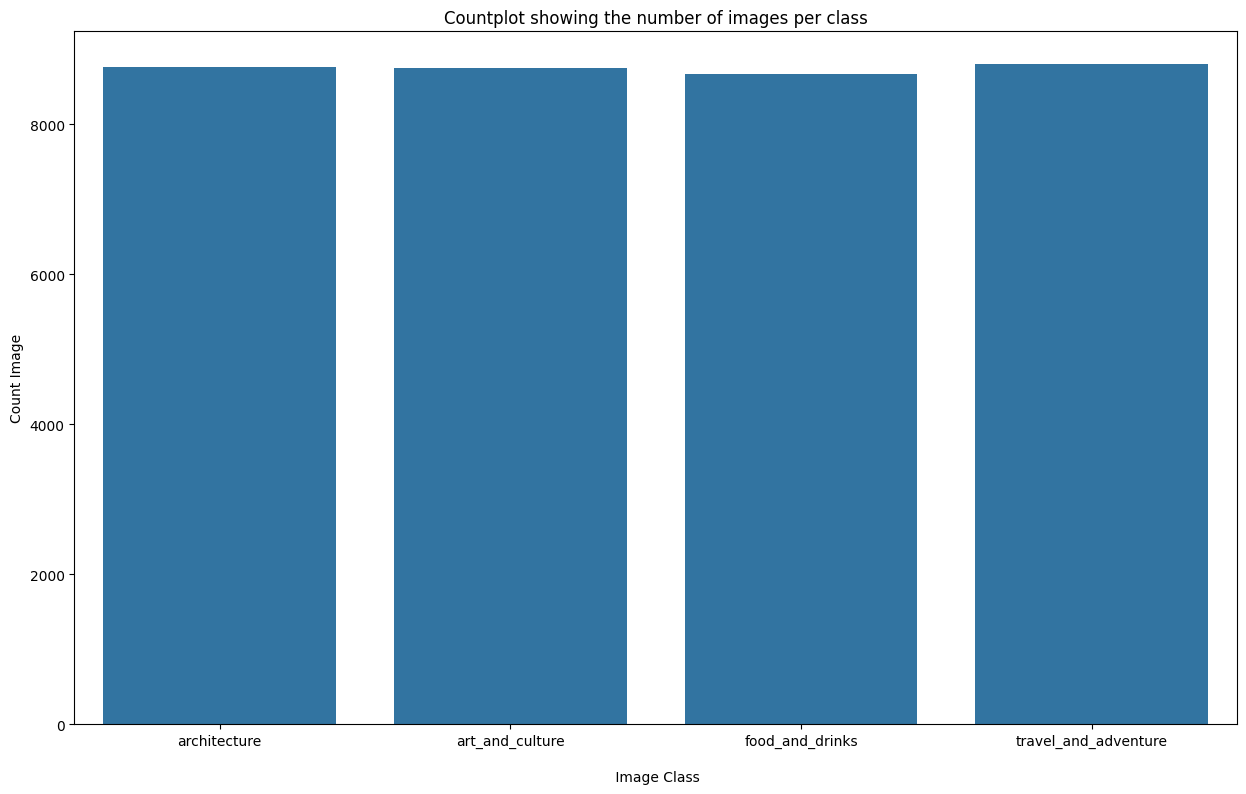

In [17]:
fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(data=df_pst, x='Class')
plt.title('Countplot showing the number of images per class')
plt.xlabel('\n Image Class')
plt.ylabel('Count Image')

Run the train-test folder split for  VGG and Inception:

In [18]:
!python split_architecture.py
!python split_art_and_culture.py
!python split_food_and_drinks.py
!python split_travel_and_adventure.py

copying training data
data/architecture/
Image_5929.jpg
data/architecture/
Image_6262.jpg
data/architecture/
Image_5142.jpg
data/architecture/
Image_6108.jpg
data/architecture/
Image_6182.jpg
data/architecture/
Image_4272.jpg
data/architecture/
Image_1124.jpg
data/architecture/
Image_7829.jpg
data/architecture/
Image_2353.jpg
data/architecture/
Image_7779.jpg
data/architecture/
Image_217.jpg
data/architecture/
Image_1273.jpg
data/architecture/
Image_2632.jpg
data/architecture/
Image_7216.jpg
data/architecture/
Image_8583.jpg
data/architecture/
Image_266.jpg
data/architecture/
Image_8399.jpg
data/architecture/
Image_4430.jpg
data/architecture/
Image_4405.jpg
data/architecture/
Image_2859.jpg
data/architecture/
Image_361.jpg
data/architecture/
Image_7062.jpg
data/architecture/
Image_164.jpg
data/architecture/
Image_5863.jpg
data/architecture/
Image_824.jpg
data/architecture/
Image_993.jpg
data/architecture/
Image_2638.jpg
data/architecture/
Image_7230.jpg
data/architecture/
Image_5458.jp

Let's begin looking at some deep learning models.

In [19]:
batch_size = 16
img_height = 128
img_width = 128

In [20]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 34984 files belonging to 4 classes.
Using 31486 files for training.


2024-02-23 10:10:37.385716: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-23 10:10:37.391816: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-23 10:10:37.392030: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Let's take a look at some sample images

In [21]:
class_names = train_ds.class_names
print(class_names)

['architecture', 'art_and_culture', 'food_and_drinks', 'travel_and_adventure']


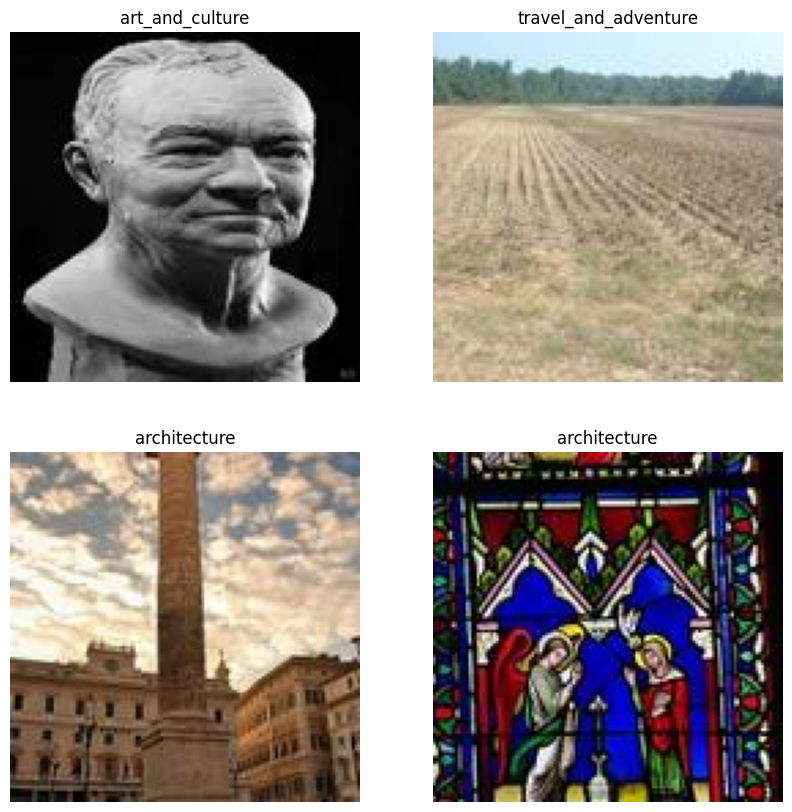

In [22]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i +1 )
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [23]:
val_ds = tf.keras.utils.image_dataset_from_directory(  #the tf terminology for this method demands the term validation where we we might otherwise use the term test. Just know that validation in this case means test, we're not doing a 3-way split of the data nor k-fold cross-validation
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 34984 files belonging to 4 classes.
Using 3498 files for validation.


Let's see if we have all the classes represented in both the training and the test set.

In [24]:
class_names_test = val_ds.class_names
print(class_names_test)

['architecture', 'art_and_culture', 'food_and_drinks', 'travel_and_adventure']


In [25]:
#Scaling the data - part of EDA
normalization_layer = layers.Rescaling(1./255)

In [26]:
#begin with a custom Keras model, as per the tutorial on the tensorflow website pertaining to image classification:
num_classes = 4

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [27]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [28]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


2024-02-23 10:10:40.410164: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
2024-02-23 10:10:41.210535: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f1c2077e000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-23 10:10:41.210566: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-02-23 10:10:41.217436: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708683041.291515   10558 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1968/1968 [==============================] - 42s 19ms/step - loss: 0.8875 - accuracy: 0.6351 - val_loss: 0.6886 - val_accuracy: 0.7324
Epoch 2/50
1968/1968 [==============================] - 35s 18ms/step - loss: 0.6000 - accuracy: 0.7717 - val_loss: 0.6018 - val_accuracy: 0.7719
Epoch 3/50
1968/1968 [==============================] - 34s 17ms/step - loss: 0.4539 - accuracy: 0.8287 - val_loss: 0.6113 - val_accuracy: 0.7707
Epoch 4/50
1968/1968 [==============================] - 33s 17ms/step - loss: 0.3145 - accuracy: 0.8828 - val_loss: 0.7459 - val_accuracy: 0.7559
Epoch 5/50
1968/1968 [==============================] - 33s 17ms/step - loss: 0.2052 - accuracy: 0.9245 - val_loss: 1.0226 - val_accuracy: 0.7284
Epoch 6/50
1968/1968 [==============================] - 33s 17ms/step - loss: 0.1406 - accuracy: 0.9504 - val_loss: 1.0479 - val_accuracy: 0.7567
Epoch 7/50
1968/1968 [==============================] - 33s 17ms/step - loss: 0.1072 - accuracy: 0.9628 - val_loss: 1.2167 - val_accura

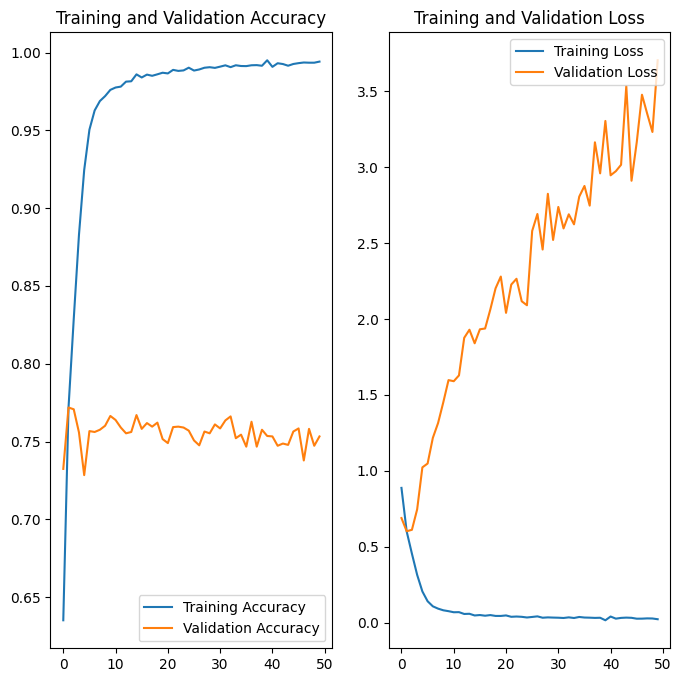

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Let's see how we can tune this model for better performance. We will first introduce an augmentation layer, then introduce dropout layers as well and.

In [30]:
img_height = 128
img_width = 128
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    #layers.RandomZoom(0.1),
  ]
)

In [31]:
model2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [32]:
model2.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                 

In [33]:
epochs = 50
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


2024-02-23 10:38:24.317560: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1968/1968 [==============================] - 49s 23ms/step - loss: 0.9273 - accuracy: 0.6171 - val_loss: 0.7659 - val_accuracy: 0.6890
Epoch 2/50
1968/1968 [==============================] - 42s 22ms/step - loss: 0.7288 - accuracy: 0.7141 - val_loss: 0.6857 - val_accuracy: 0.7273
Epoch 3/50
1968/1968 [==============================] - 42s 21ms/step - loss: 0.6709 - accuracy: 0.7400 - val_loss: 0.6885 - val_accuracy: 0.7258
Epoch 4/50
1968/1968 [==============================] - 42s 21ms/step - loss: 0.6237 - accuracy: 0.7613 - val_loss: 0.6148 - val_accuracy: 0.7613
Epoch 5/50
1968/1968 [==============================] - 42s 22ms/step - loss: 0.5941 - accuracy: 0.7706 - val_loss: 0.6249 - val_accuracy: 0.7604
Epoch 6/50
1968/1968 [==============================] - 42s 22ms/step - loss: 0.5676 - accuracy: 0.7796 - val_loss: 0.6200 - val_accuracy: 0.7693
Epoch 7/50
1968/1968 [==============================] - 42s 21ms/step - loss: 0.5454 - accuracy: 0.7911 - val_loss: 0.6526 - val_accura

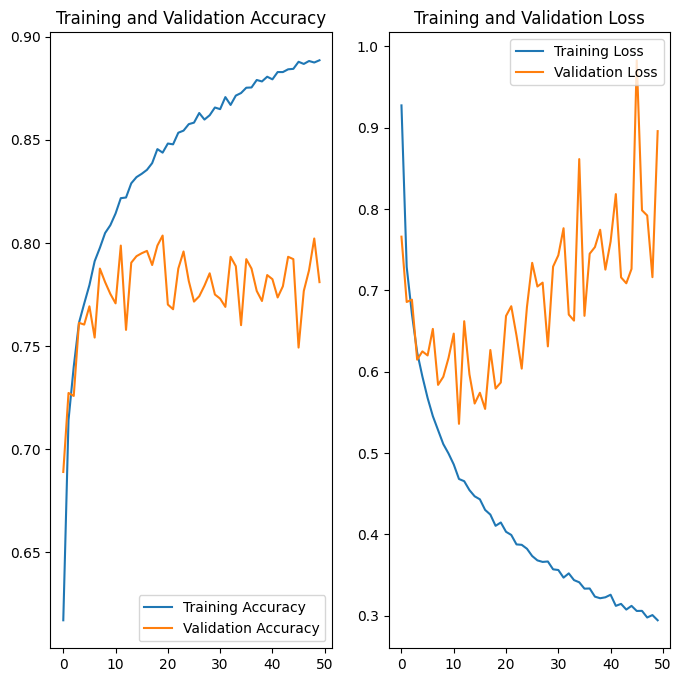

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Let's check out AlexNet next:

In [35]:
model_alexnet=keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(128,128,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4,activation='softmax')  
    
    
])


In [36]:
model_alexnet.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']    
)
model_alexnet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 128)       46592     
                                                                 
 batch_normalization (Batch  (None, 30, 30, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 15, 15, 256)       819456    
                                                                 
 batch_normalization_1 (Bat  (None, 15, 15, 256)      

In [37]:
history_alexnet=model_alexnet.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    validation_freq=1
)

Epoch 1/50
1968/1968 [==============================] - 62s 29ms/step - loss: 1.1547 - accuracy: 0.5301 - val_loss: 1.0892 - val_accuracy: 0.5177
Epoch 2/50
1968/1968 [==============================] - 53s 27ms/step - loss: 0.9234 - accuracy: 0.6400 - val_loss: 0.8507 - val_accuracy: 0.6707
Epoch 3/50
1968/1968 [==============================] - 53s 27ms/step - loss: 0.7943 - accuracy: 0.6954 - val_loss: 0.9717 - val_accuracy: 0.5832
Epoch 4/50
1968/1968 [==============================] - 54s 27ms/step - loss: 0.7256 - accuracy: 0.7282 - val_loss: 0.9604 - val_accuracy: 0.6409
Epoch 5/50
1968/1968 [==============================] - 54s 28ms/step - loss: 0.6626 - accuracy: 0.7531 - val_loss: 1.1215 - val_accuracy: 0.6212
Epoch 6/50
1968/1968 [==============================] - 53s 27ms/step - loss: 0.6017 - accuracy: 0.7772 - val_loss: 0.8141 - val_accuracy: 0.6872
Epoch 7/50
1968/1968 [==============================] - 53s 27ms/step - loss: 0.5534 - accuracy: 0.7919 - val_loss: 1.3107 -

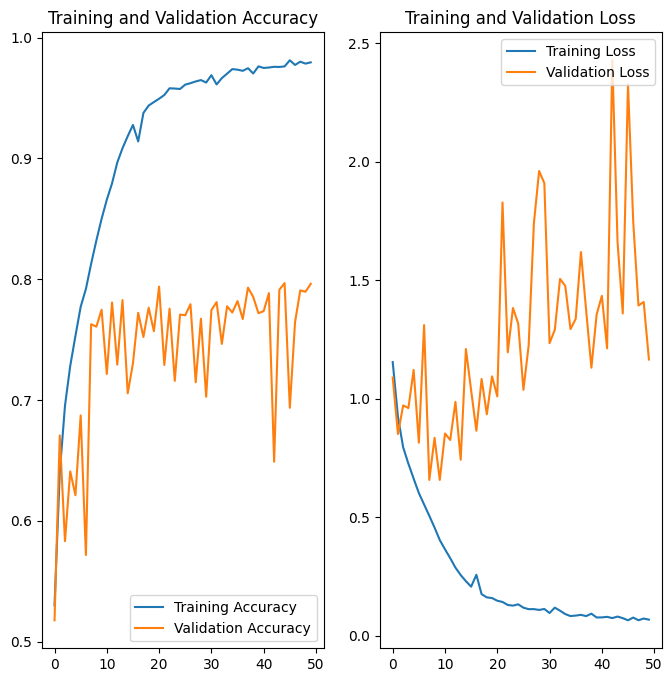

In [38]:
acc = history_alexnet.history['accuracy']
val_acc = history_alexnet.history['val_accuracy']

loss = history_alexnet.history['loss']
val_loss = history_alexnet.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Let's take another look at AlexNet, now after some tuning. We already had dropout layers, now we've introduced augmentation.

In [39]:
model_alexnet2=keras.models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(128,128,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4,activation='softmax')  
    
    
])

In [40]:
model_alexnet2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']    
)
model_alexnet2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 30, 30, 128)       46592     
                                                                 
 batch_normalization_5 (Bat  (None, 30, 30, 128)       512       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 15, 15, 256)      

In [41]:
history_alexnet2=model_alexnet2.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    validation_freq=1
)

Epoch 1/50
1968/1968 [==============================] - 60s 29ms/step - loss: 1.1968 - accuracy: 0.5039 - val_loss: 1.0536 - val_accuracy: 0.5497
Epoch 2/50
1968/1968 [==============================] - 58s 29ms/step - loss: 0.9790 - accuracy: 0.6066 - val_loss: 1.0701 - val_accuracy: 0.5640
Epoch 3/50
1968/1968 [==============================] - 57s 29ms/step - loss: 0.8842 - accuracy: 0.6537 - val_loss: 0.9153 - val_accuracy: 0.6309
Epoch 4/50
1968/1968 [==============================] - 57s 29ms/step - loss: 0.8146 - accuracy: 0.6889 - val_loss: 0.7846 - val_accuracy: 0.6747
Epoch 5/50
1968/1968 [==============================] - 57s 29ms/step - loss: 0.7642 - accuracy: 0.7081 - val_loss: 1.4859 - val_accuracy: 0.5252
Epoch 6/50
1968/1968 [==============================] - 57s 29ms/step - loss: 0.7270 - accuracy: 0.7195 - val_loss: 0.8741 - val_accuracy: 0.6558
Epoch 7/50
1968/1968 [==============================] - 57s 29ms/step - loss: 0.6936 - accuracy: 0.7376 - val_loss: 0.7027 -

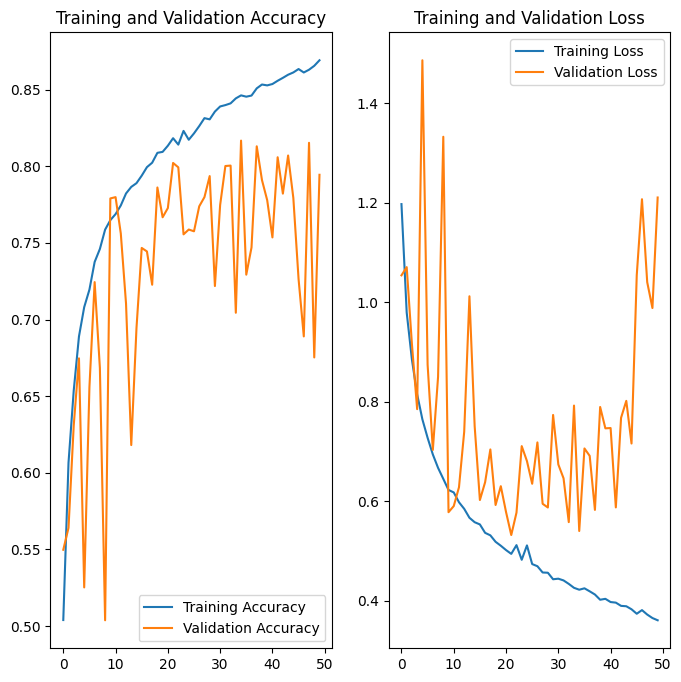

In [42]:
epochs=50
acc = history_alexnet2.history['accuracy']
val_acc = history_alexnet2.history['val_accuracy']

loss = history_alexnet2.history['loss']
val_loss = history_alexnet2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Let's give VGG a try. We'll be using the keras application for VGG16.

In [43]:
import os
from keras.models import Model
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np


In [44]:


train_generator = ImageDataGenerator(rescale = 1./255,
                                     rotation_range=90, 
                                     brightness_range=[0.1, 0.7],
                                     width_shift_range=0.5, 
                                     height_shift_range=0.5,
                                     horizontal_flip=True, 
                                     vertical_flip=True,
                                    # validation_split=0.15,
                                    #fill_mode = 'constant',
                                     preprocessing_function=preprocess_input) # VGG16 preprocessing

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input) # VGG16 preprocessing


In [45]:
BATCH_SIZE=16

train_data_dir = 'training_data'
test_data_dir = 'test_data'

traingen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(128, 128),
                                               class_mode='categorical',
                                               
                                               
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True,
                                               seed=42)

testgen = train_generator.flow_from_directory(test_data_dir,
                                               target_size=(128, 128),
                                               class_mode='categorical',
                                               
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)




Found 31484 images belonging to 4 classes.
Found 3500 images belonging to 4 classes.


In [46]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [47]:
input_shape = (128, 128, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=4

n_steps = traingen.samples // BATCH_SIZE
n_test_steps = testgen.samples // BATCH_SIZE
n_epochs = 50

# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=2)
vgg_model.summary()


58889256/58889256 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [48]:
vgg_history = vgg_model.fit(traingen,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=testgen,
                            steps_per_epoch=n_steps,
                            validation_steps=n_test_steps,
                            
                            verbose=1)


Epoch 1/50
1967/1967 [==============================] - 234s 116ms/step - loss: 1.0533 - accuracy: 0.5515 - val_loss: 0.9752 - val_accuracy: 0.5903
Epoch 2/50
1967/1967 [==============================] - 223s 113ms/step - loss: 0.9323 - accuracy: 0.6088 - val_loss: 0.9520 - val_accuracy: 0.6058
Epoch 3/50
1967/1967 [==============================] - 223s 113ms/step - loss: 0.8967 - accuracy: 0.6277 - val_loss: 0.9367 - val_accuracy: 0.5860
Epoch 4/50
1967/1967 [==============================] - 223s 113ms/step - loss: 0.8793 - accuracy: 0.6387 - val_loss: 0.8393 - val_accuracy: 0.6525
Epoch 5/50
1967/1967 [==============================] - 223s 113ms/step - loss: 0.8603 - accuracy: 0.6498 - val_loss: 0.8832 - val_accuracy: 0.6267
Epoch 6/50
1967/1967 [==============================] - 223s 113ms/step - loss: 0.8524 - accuracy: 0.6520 - val_loss: 0.8603 - val_accuracy: 0.6451
Epoch 7/50
1967/1967 [==============================] - 223s 113ms/step - loss: 0.8428 - accuracy: 0.6562 - val_

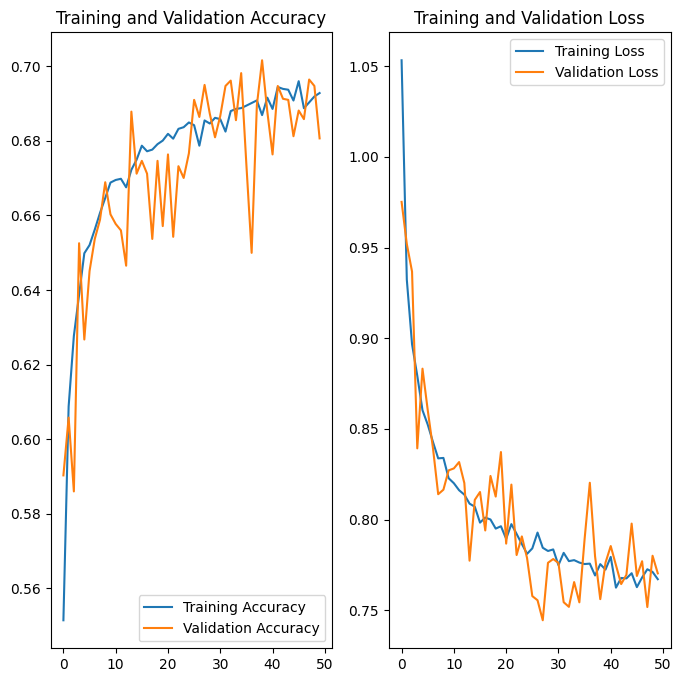

In [49]:
acc = vgg_history.history['accuracy']
val_acc = vgg_history.history['val_accuracy']

loss = vgg_history.history['loss']
val_loss = vgg_history.history['val_loss']

epochs_range = range(n_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Let's give it a shot with InceptionV3

In [50]:


train_generator_in = ImageDataGenerator(rescale = 1./255,
                                     rotation_range=90, 
                                     brightness_range=[0.1, 0.7],
                                     width_shift_range=0.5, 
                                     height_shift_range=0.5,
                                     horizontal_flip=True, 
                                     vertical_flip=True,
                                    # validation_split=0.15,
                                    # fill_mode = 'constant',
                                     preprocessing_function=preprocess_input) # VGG16 preprocessing

test_generator_in = ImageDataGenerator( preprocessing_function=preprocess_input) # VGG16 preprocessing


In [51]:
BATCH_SIZE=16

train_data_dir = 'training_data'
test_data_dir = 'test_data'

traingen_in = train_generator_in.flow_from_directory(train_data_dir,
                                               target_size=(128, 128),
                                               class_mode='categorical',
                                               
                                               
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True,
                                               seed=42)

testgen_in = train_generator_in.flow_from_directory(test_data_dir,
                                               target_size=(128, 128),
                                               class_mode='categorical',
                                               
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)


Found 31484 images belonging to 4 classes.
Found 3500 images belonging to 4 classes.


In [52]:
def create_model_in(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = InceptionV3(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer= optimizer, #RMSprop(lr=0.0001), 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [53]:
input_shape = (128, 128, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=4

n_steps = traingen_in.samples // BATCH_SIZE
n_test_steps = testgen_in.samples // BATCH_SIZE
n_epochs = 50


inc_model = create_model(input_shape, n_classes, optim_1, fine_tune=2)
inc_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [54]:
inc_history = inc_model.fit(traingen_in,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=testgen_in,
                            steps_per_epoch=n_steps,
                            validation_steps=n_test_steps,
                            
                            verbose=1)

Epoch 1/50
1967/1967 [==============================] - 224s 114ms/step - loss: 1.0527 - accuracy: 0.5450 - val_loss: 0.9419 - val_accuracy: 0.6124
Epoch 2/50
1967/1967 [==============================] - 223s 113ms/step - loss: 0.9366 - accuracy: 0.6091 - val_loss: 0.8871 - val_accuracy: 0.6224
Epoch 3/50
1967/1967 [==============================] - 223s 113ms/step - loss: 0.9001 - accuracy: 0.6247 - val_loss: 0.8839 - val_accuracy: 0.6342
Epoch 4/50
1967/1967 [==============================] - 223s 113ms/step - loss: 0.8954 - accuracy: 0.6334 - val_loss: 0.8595 - val_accuracy: 0.6505
Epoch 5/50
1967/1967 [==============================] - 223s 113ms/step - loss: 0.8791 - accuracy: 0.6365 - val_loss: 0.8516 - val_accuracy: 0.6497
Epoch 6/50
1967/1967 [==============================] - 222s 113ms/step - loss: 0.8690 - accuracy: 0.6455 - val_loss: 0.8572 - val_accuracy: 0.6482
Epoch 7/50
1967/1967 [==============================] - 223s 113ms/step - loss: 0.8584 - accuracy: 0.6478 - val_

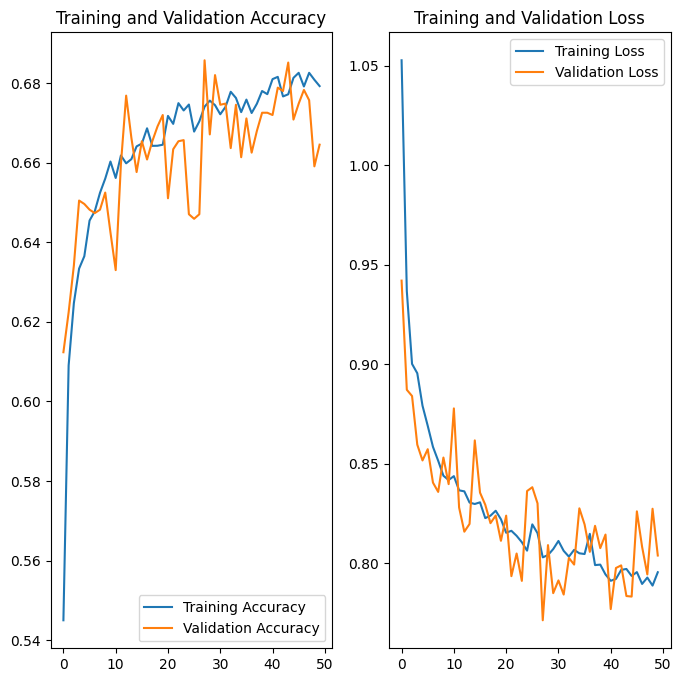

In [55]:
acc = inc_history.history['accuracy']
val_acc = inc_history.history['val_accuracy']

loss = inc_history.history['loss']
val_loss = inc_history.history['val_loss']

epochs_range = range(n_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()